In [4]:
import numpy as np
# sigmoid playground
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))


Text(0, 0.5, 'sigmoid(x)')

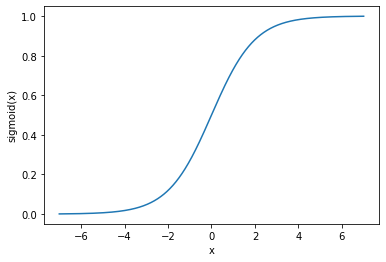

In [12]:
# first of all, let's plot it 
x = np.linspace(-7,7,1000)
plot(x, sigmoid(x))
xlabel("x")
ylabel("sigmoid(x)")

In [16]:
# what is the value at -0.4
activation = 0.6 - 5*0.3
print(activation)
print(sigmoid(-0.9))

-0.9
0.289050497374996


0.017662706213291118
0.19661193324148185
0.25
0.19661193324148185
0.017662706213291107


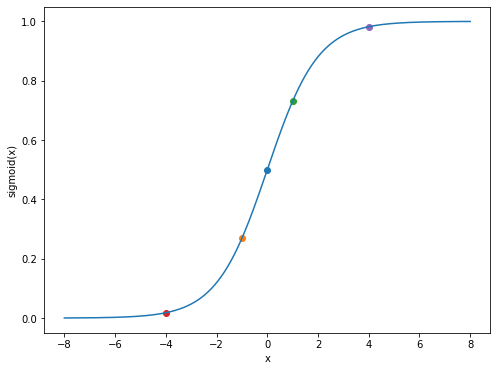

In [31]:
# let's test the derivative for a couple of points

def dsigmoid(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

x = np.linspace(-8,8,1000)
figure(figsize=(8,6))
plot(x, sigmoid(x))
scatter(0, sigmoid(0))
scatter(-1, sigmoid(-1))
scatter(1, sigmoid(1))
scatter(-4, sigmoid(-4))
scatter(4, sigmoid(4))
xlabel("x")
ylabel("sigmoid(x)")
savefig("sigmoid-points.png")

print(dsigmoid(-4))
print(dsigmoid(-1))
print(dsigmoid(0))
print(dsigmoid(1))
print(dsigmoid(4))

In [32]:
def check_gradient(func, x):
    eps = 0.001
    numeric_gradient = (func(x+eps)-func(x)) / eps
    return numeric_gradient

print("Analytic gradient at 1:", dsigmoid(1))
print("Numeric gradient at 1:", check_gradient(sigmoid, 1))

Analytic gradient at 1: 0.19661193324148185
Numeric gradient at 1: 0.1965664984852067


## Interpret sigmoid as probability

In [34]:
# first, for the softmax case 
score1, score2 = 1.5, -0.5
e_score1, e_score2 = np.exp(score1), np.exp(score2)
print(e_score1, e_score2)
summed = e_score1 + e_score2
print(summed)
norm_score1, norm_score2 = e_score1 / summed, e_score2 / summed
print(norm_score1, norm_score2)

4.4816890703380645 0.6065306597126334
5.088219730050698
0.8807970779778824 0.11920292202211757


In [39]:
# now for sigmoid

log_score1 = -0.4
score1 = np.exp(log_score1)
print(score1)
log_score2 = 0.4
score2 = np.exp(log_score2)
print(score2)

0.6703200460356393
1.4918246976412703


In [42]:
# now investigate score 1
sum1 = score1+1
prob0 = 1 / sum1
prob1 = score1 / sum1
print(prob0, prob1)

0.598687660112452 0.401312339887548


In [43]:
# let's compare this to the sigmoid output for the unnormalized
# log-probability:
print(sigmoid(log_score1))

0.401312339887548


In [44]:
# now investigate score 2
sum2 = score2+1
prob0 = 1 / sum2
prob1 = score2 / sum2
print(sum2)
print(prob0, prob1)

2.4918246976412703
0.401312339887548 0.598687660112452


In [45]:
# and similarly, just take the sigmoid output
print(sigmoid(log_score2))

0.598687660112452


In [46]:
log_score1 = -0.4

# make exponentiating and normalizing explicit
score1 = np.exp(log_score1)
sum1 = score1+1
prob0 = 1 / sum1
prob1 = score1 / sum1
print(prob0, prob1)

# compare that to the output of sigmoid 
# of the unnormalized score
print(1-sigmoid(log_score1), sigmoid(log_score1))

0.598687660112452 0.401312339887548
0.598687660112452 0.401312339887548
